In [1]:
import numpy as np 
import pandas as pd
from math import pi
import matplotlib.pyplot as plt
from astropy.units import deg
from scipy.fftpack import fft
from matplotlib.colors import LogNorm
from scipy.fftpack import fft2, ifft2
from numpy import random
from scipy import signal
import matplotlib as mpl

In [2]:
df = pd.read_csv('D_ell.csv')
col1 = df.ell
col2 = df.D_ell
#col2[0]
#col1[0]

d = (col1 + 1)*col1
#print(d)
c_ell = col2 / (d/(2*pi))
C_ell = round(c_ell,10)
#print(C_ell)

In [6]:
def M1_ell(X,Y):
    a=[[0 for i in range(0, 2160, 1)]for j in range(0, 2160, 1)]
    matrix = []
    for i in range(0, 2160, 1):
        sub = []
        #print(i)
        for j in range(0, 2160, 1):
            #print(j)
            if round(np.sqrt(i**2 + j**2))>=2 and round(np.sqrt(i**2 + j**2))<=5049:
                #print(np.sqrt(i**2 + j**2))
                #modulo = round(np.sqrt(i**2 + j**2))
                #print(modulo)
                #mod = round(modulo)
                #print(round(np.sqrt(i**2 + j**2)))
                n = a[i][j] = C_ell[round(np.sqrt(i**2 + j**2))]
            else:
                n = a[i][j] = 0
            #print(i,j)
            #print(a[i][j])
                #matrix.append(sub)
            sub.append(n)
        matrix.append(sub)
    return matrix #np.array(matrix)

In [7]:
X = np.linspace(0, 2160, 2160)
Y = np.linspace(0, 2160, 2160)
x = np.linspace(0, 2160, 2160)
y = np.linspace(0, 2160, 2160)

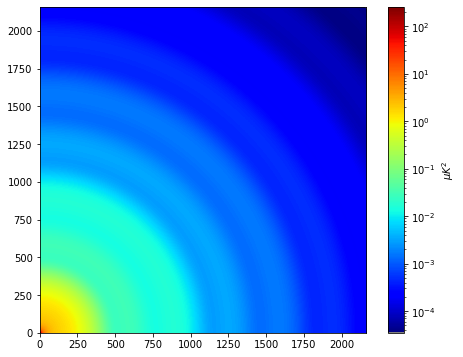

In [8]:
plt.figure(figsize=(8,6))
plt.ylim(0, 2160)

cmap = plt.cm.jet
cmaplist = [cmap(i) for i in range(cmap.N)]
cmaplist[0] = (.5, .5, .5, 1.0)
cmap = mpl.colors.LinearSegmentedColormap.from_list(
    'Custom cmap', cmaplist, cmap.N)
bounds = np.linspace(0, 20, 21)
norm = mpl.colors.BoundaryNorm(bounds, cmap.N)

image = plt.imshow(M1_ell(x,y), cmap=cmap, norm=LogNorm())
cbar = plt.colorbar()
cbar.set_label('$\mu K^2$', rotation=90)
fig1 = plt.gcf()
fig1.savefig('M_tilde.png', dpi=100)
plt.show()

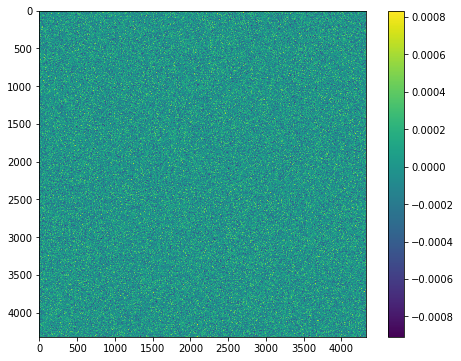

<Figure size 432x288 with 0 Axes>

In [9]:
mu, sigma = 0, 1 # mean and standard deviation
X = np.random.normal(mu, sigma, size=(4321,4321))
G_ell = np.fft.ifft2(X) #espacio real

plt.figure(figsize=(8,6))
#plt.ylim(0,800)
plt.imshow(G_ell.real)
plt.colorbar()
fig2 = plt.gcf()
plt.show()
plt.draw()
fig2.savefig('G_ell.png', dpi=100)